In [1]:
import numpy as np
import matplotlib.pyplot as plt

from darksim.utils import const

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

(0.0, 3.0)

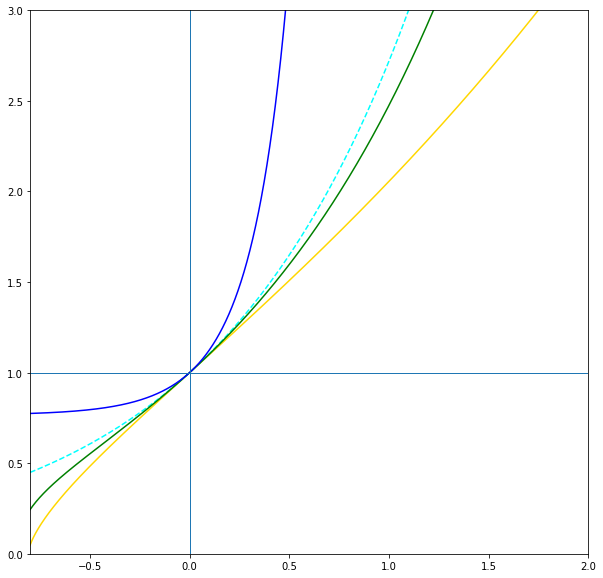

In [33]:
# Htimes is in terms of hubble times H_0* (t - t0)
Htimes = np.linspace(-.8, 10, 100000)
plt.plot(Htimes, a(Htimes, 1, 0), color='gold') # Big Rip
# plt.plot(Htimes, a(Htimes, 4, -10), color='black')
plt.plot(Htimes, a(Htimes, 4, -1), color='cyan', linestyle='dashed') # \Omega_m = 1, de Sitter Universe
# plt.plot(Htimes, a(Htimes, 3.5, -3), color='blue')
# plt.plot(Htimes, a(Htimes, 5, -3), color='purple')
# plt.plot(Htimes, a(Htimes, .4, -8), color='red')
plt.plot(Htimes, a(Htimes, 4.389, -2.166), color='green') # Decelerating today
plt.plot(Htimes, a(Htimes, 8,2), color='blue') # No Big Bang
plt.axvline(x=0, linewidth=1)
plt.axhline(y=1, linewidth=1)
plt.xlim([-.8,2])
plt.ylim([0,3])
# plt.rcParams['fig.figsize'] = (15,15)

(0.0, 10.0)

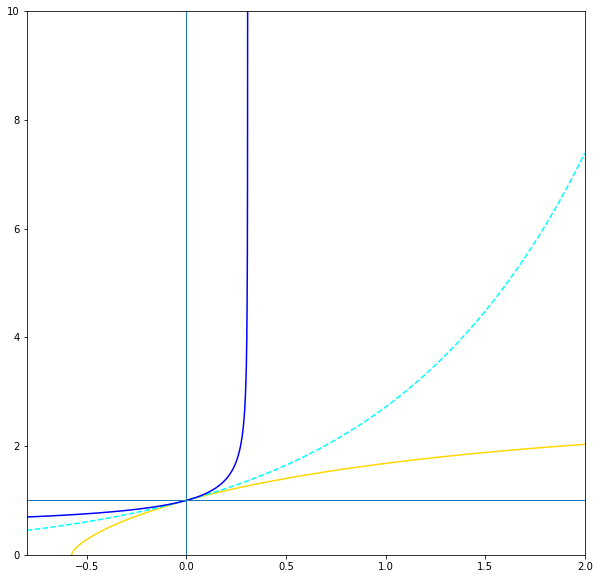

In [72]:
# Htimes is in terms of hubble times H_0* (t - t0)
Htimes = np.linspace(-.8, 10, 100000)
plt.plot(Htimes, a(Htimes, -1, 0), color='gold') # Big Rip
# plt.plot(Htimes, a(Htimes, 4, -10), color='black')
plt.plot(Htimes, a(Htimes, 4, -1), color='cyan', linestyle='dashed') # \Omega_m = 1, de Sitter Universe
# plt.plot(Htimes, a(Htimes, 3.5, -3), color='blue')
# plt.plot(Htimes, a(Htimes, 5, -3), color='purple')
# plt.plot(Htimes, a(Htimes, .4, -8), color='red')
# plt.plot(Htimes, a(Htimes, 1,2), color='green') # Decelerating today
plt.plot(Htimes, a(Htimes, 1,9), color='blue') # No Big Bang
plt.axvline(x=0, linewidth=1)
plt.axhline(y=1, linewidth=1)
plt.xlim([-.8,2])
plt.ylim([0,10])
# plt.rcParams['fig.figsize'] = (15,15)

In [43]:
death_of_universe(a(Htimes, 0.0001,0), Htimes)

99999


'This Model Universe does not meet any of our criteria to lead us to believe that it will result in a Big Rip, Big Crunch, or Heat Death.'

In [29]:
def death_of_universe(scale_factor, time_array):
    #set constants for speed of light, c, and buffer, a
    c = 2.99792458e8 * 3.1536e7 * 10e8 * 3.2408e-23 #Mpc per gigayear
    buffer = -10e-3
    L0 = 100
    N = 256
    count = 0
    #L0 = self.info['L0']
    #N = self.info['N_mesh']
    for i in range(len(time_array) - 1):
        count += 1
        da = scale_factor[i + 1] - scale_factor[i]
        dt = time_array[i + 1] - time_array[i]
        #checking if the derivative of the scale factor ever exceeds the speed of light
        if da / dt > c:
            print(da/dt)
            print(count)
            a = (scale_factor[i + 1] + scale_factor[i]) / 2
            t = ((time_array[i + 1] + time_array[i]) / 2) * 13.8
            return (f"Death of the Universe will be due to a Big Rip, with the first sign of "\
                    "it being at a \ntime: " + str(t) + " gigayears, and scale factor: " +str(a))
        #checking if the derivative of the scale factor ever exceeds a negative buffer
        elif da / dt < buffer:
            print(da/dt)
            print(count)
            a = (scale_factor[i + 1] + scale_factor[i]) / 2
            t = ((time_array[i + 1] + time_array[i]) / 2) * 13.8
            return (f"Death of the Universe will be due to a Big Crunch, with the first sign "\
                    "of it being at a time: " + str(t) + " gigayears, and scale factor: " + str(a))
        #checking the average spacing of the universe at the last time step
#         elif i == len(time_array) - 1:
#             print(count)
#             results = uni.simulate(0.01, 5, 15, N_mesh = 16)[0]
#             x, y, z = results[-1][0,0,:,0], results[-1][0,0,:,1], results[-1][0,0,:,2]
#             n = len(x)
#             av_distance = average_finder(x, y, z)
#             expected_av = (scale_factor[i] * L0) / N
#             buffer = .02 * expected_av
#             if abs(av_distance - expected_av) < buffer:
#                 return ("Even distribution of bodies at the final time step leads us to beleive "\
#                         "that this Model Universe will result in a Heat Death")
    print(count)
    return ("This Model Universe does not meet any of our criteria to lead us to believe that "\
            "it will result in a Big Rip, Big Crunch, or Heat Death.")